# 2 Importações

In [1]:
import sys
import os
sys.path.append(os.path.join(os.path.dirname(__file__), '../../') if '__file__' in globals() else '../../')

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from src.util import dados_limpos_Situacao

In [2]:
df = pd.read_csv("../../data/raw/DH_2022_Br_Regioes_20240423.xlsx - Situacao.csv")
df_regioes, df_brasil = dados_limpos_Situacao(df)

# 2.1 Deficit habitacional total por região: 

In [3]:
deficit_por_regiao = df_regioes.groupby('regiao')['deficit_total'].sum().sort_values(ascending=False)

print(deficit_por_regiao)

regiao
Sudeste         2443641.0
Nordeste        1761032.0
Norte            773330.0
Sul              737626.0
Centro-Oeste     499684.0
Name: deficit_total, dtype: float64


# 2.2 Visualização

C:\Users\mtand\AppData\Local\Temp\ipykernel_21460\916839759.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = deficit_por_regiao.index, y = deficit_por_regiao.values, palette= 'viridis')


<function matplotlib.pyplot.show(close=None, block=None)>

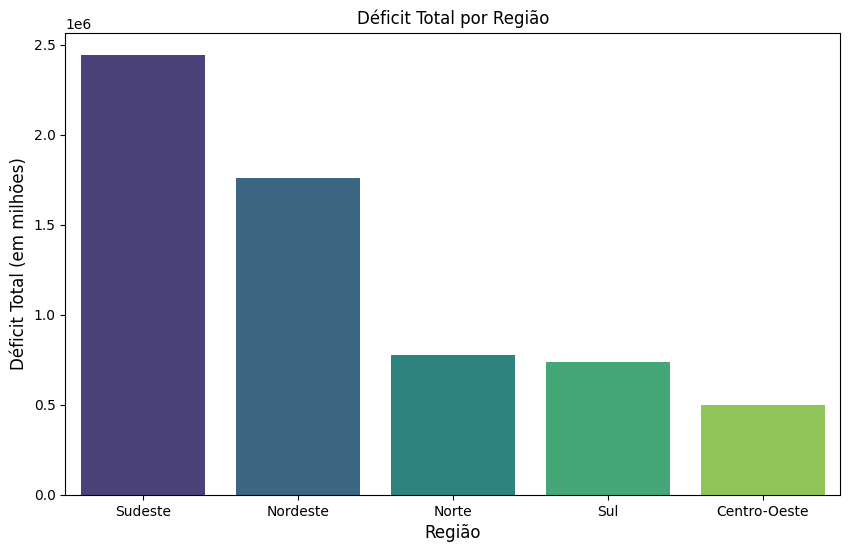

In [4]:
plt.figure(figsize=(10, 6))
sns.barplot(x = deficit_por_regiao.index, y = deficit_por_regiao.values, palette= 'viridis')

plt.title('Déficit Total por Região')
plt.xlabel('Região', fontsize = 12)
plt.ylabel('Déficit Total (em milhões)', fontsize = 12)
plt.show

# 2.3 Decomposição do déficit por componentes

<function matplotlib.pyplot.show(close=None, block=None)>

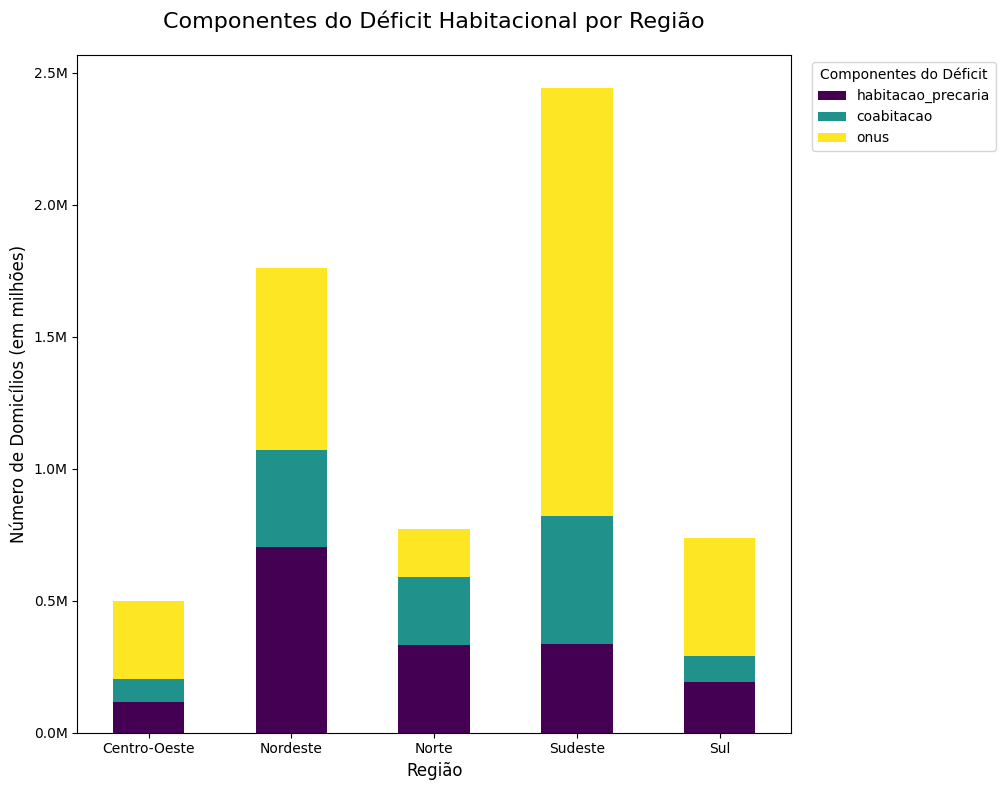

In [7]:
componentes_por_regiao = df_regioes.groupby('regiao')[['habitacao_precaria', 'coabitacao', 'onus']].sum()

componentes_por_regiao.plot(
    kind = 'bar',
    stacked = True,
    figsize = (12, 8),
    colormap = 'viridis',
)

plt.title('Componentes do Déficit Habitacional por Região', fontsize = 16, pad = 20)
plt.xlabel('Região', fontsize=12)
plt.ylabel('Número de Domicílios (em milhões)', fontsize=12)
plt.xticks(rotation = 0)

formatter = plt.FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)

plt.legend(title='Componentes do Déficit', bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout(rect=[0, 0, 0.85, 1])
plt.show

# 2.4 Comparativo Urbano vs. Rural

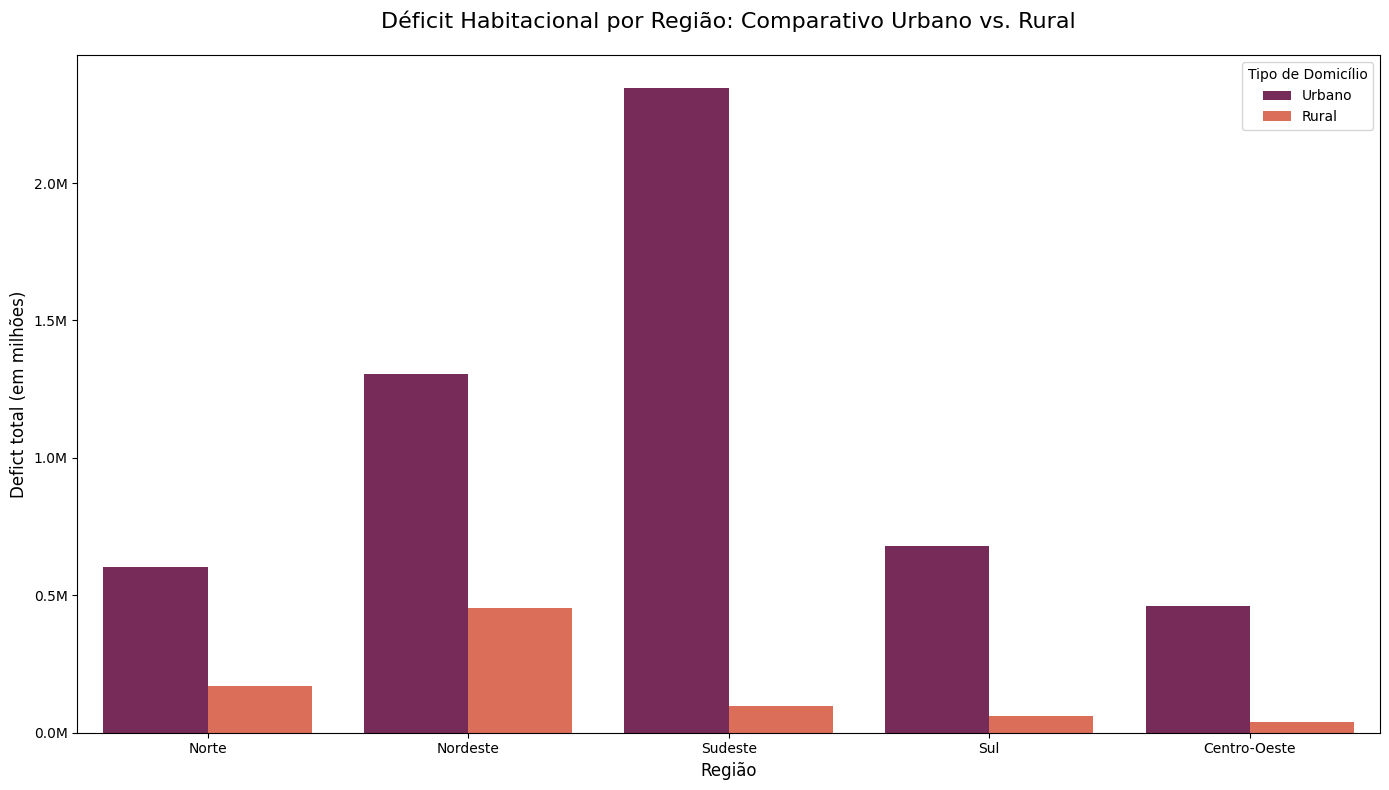

In [8]:
plt.figure(figsize=(14, 8))

sns.barplot(
    data = df_regioes,
    x = 'regiao',
    y = 'deficit_total',
    hue = 'domicilio',
    palette = 'rocket'
)

plt.title('Déficit Habitacional por Região: Comparativo Urbano vs. Rural', fontsize = 16, pad = 20)
plt.xlabel('Região', fontsize=12)
plt.ylabel('Defict total (em milhões)', fontsize = 12)
plt.xticks(rotation = 0)

formatter = plt.FuncFormatter(lambda x, pos: f'{x/1e6:.1f}M')
plt.gca().yaxis.set_major_formatter(formatter)

plt.legend(title='Tipo de Domicílio')
plt.tight_layout()
plt.show()